# Iris-Cancer Constrained Attention Experiments


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Input
from keras.datasets import mnist
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras import initializers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
import time
import keras
import seaborn as sns # data visualization library  

from math import log
print(keras.__version__)
%tensorflow_version 2.x
%matplotlib inline 
from sklearn.utils import shuffle

2.5.0


Load Data set 

Download data set as data.csv from [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = pd.read_csv('data.csv')
data.head()
col = data.columns 
print(col)
y = data.diagnosis
list = ['Unnamed: 32','id','diagnosis']

# remove first cols that are unneeded
x = data.drop(list, axis=1)

#display
x.head()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# remove unneeded columns
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list, axis=1)

# display
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3)

In [ ]:
lookupTable, indexed_dataSet = np.unique(y_train, return_inverse=True)

y_train = indexed_dataSet

lookupTable, indexed_dataSet = np.unique(y_test, return_inverse=True)

y_test = indexed_dataSet

Class weights if needed

In [ ]:
# model = get_model()
# class_weight = {0: 50.,
#                 1: 1.}
# model.fit(x_train[0:5], y_train[0:5], epochs=1000, batch_size=8, class_weight=class_weight)
# # calc_acc(model, x_test, y_test)

In [ ]:
def one_hot(array):
    unique, inverse = np.unique(array, return_inverse=True)
    onehot = np.eye(unique.shape[0])[inverse]
    return onehot

y_train = one_hot(y_train)
y_test = one_hot(y_test)

Define model code and train on cancer data

In [ ]:
num_classes=2
model = Sequential()
input_shape=(16,)
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Epoch 1/500
10/10 [==============================] - 14s 51ms/step - loss: 10.9304 - accuracy: 0.4730 - val_loss: 7.5390 - val_accuracy: 0.6375
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 7.1302 - accuracy: 0.5348 - val_loss: 4.1163 - val_accuracy: 0.6625
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 3.4497 - accuracy: 0.6176 - val_loss: 3.8932 - val_accuracy: 0.6625
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 2.1673 - accuracy: 0.6391 - val_loss: 0.7541 - val_accuracy: 0.6500
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.8744 - accuracy: 0.6415 - val_loss: 0.7832 - val_accuracy: 0.7500
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.9585 - accuracy: 0.7274 - val_loss: 0.8164 - val_accuracy: 0.6125
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.7269 - accuracy: 0.6893 - val_loss: 1.4942 - val_accuracy: 0.7250
Epoch 8/50

Load iris

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
iris_x = np.array(iris.data[:, :4])
iris_y = iris.target
print(iris_x.shape, type(iris_x))
iris_x_df = pd.DataFrame(iris_x, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

(150, 4) <class 'numpy.ndarray'>


Join the data sets

In [ ]:
frames = [x_train[0:150], iris_x_df[0:150]]
print(frames[0].shape, frames[1].shape)

frames[0].reset_index(drop=True, inplace=True)
frames[1].reset_index(drop=True, inplace=True)
joined_x = pd.concat(frames, axis=1)
print(joined_x.shape)

(150, 16) (150, 4)
(150, 20)


# Training with Iris-Cancer

In [ ]:
num_classes=2
unconstrained_model = Sequential()
input_shape=(20,)
unconstrained_model.add(Dense(350, input_shape=input_shape, activation='relu'))
unconstrained_model.add(Dense(50, activation='relu'))
unconstrained_model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
unconstrained_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
unconstrained_model.fit(joined_x, y_train, epochs=500, batch_size=250, verbose=1, validation_split=0.2)


Epoch 1/500
1/1 [==============================] - 1s 761ms/step - loss: 4.3293 - accuracy: 0.3000 - val_loss: 33.3428 - val_accuracy: 0.5667
Epoch 2/500
1/1 [==============================] - 0s 21ms/step - loss: 23.1848 - accuracy: 0.7000 - val_loss: 34.2450 - val_accuracy: 0.5667
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 23.6921 - accuracy: 0.7000 - val_loss: 22.7692 - val_accuracy: 0.5667
Epoch 4/500
1/1 [==============================] - 0s 23ms/step - loss: 15.8191 - accuracy: 0.7000 - val_loss: 4.6154 - val_accuracy: 0.5667
Epoch 5/500
1/1 [==============================] - 0s 19ms/step - loss: 3.3425 - accuracy: 0.7000 - val_loss: 11.2754 - val_accuracy: 0.4333
Epoch 6/500
1/1 [==============================] - 0s 23ms/step - loss: 14.4864 - accuracy: 0.3000 - val_loss: 15.8072 - val_accuracy: 0.4333
Epoch 7/500
1/1 [==============================] - 0s 19ms/step - loss: 20.2658 - accuracy: 0.3000 - val_loss: 14.7494 - val_accuracy: 0.4333
Epoch 8/

In [ ]:

# Test the model after training
# test_results = model.evaluate(x_test, y_test, verbose=1)
# print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

# Constrained Iris-Cancer

First we define a mask


In [ ]:
mask_right = np.ones(shape=(4,))
mask_left = np.zeros(shape=(16,))
print(mask_left.shape, mask_right.shape)

mask = np.concatenate((mask_left, mask_right))

print(mask.shape)
print(mask)

(16,) (4,)
(20,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]


# Unconstrained_model
Restart the same model as above




In [ ]:
num_classes=2
unconstrained_model = Sequential()
input_shape=(20,)
unconstrained_model.add(Dense(350, input_shape=input_shape, activation='relu'))
unconstrained_model.add(Dense(50, activation='relu'))
unconstrained_model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
unconstrained_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
unconstrained_model.fit(joined_x, y_train[0:150], epochs=500, batch_size=8, verbose=1)


Epoch 1/500
19/19 [==============================] - 1s 2ms/step - loss: 16.7588 - accuracy: 0.6173
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 3.0162 - accuracy: 0.5219
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 1.5906 - accuracy: 0.5521
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.9859 - accuracy: 0.7242
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8695 - accuracy: 0.6989
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8699 - accuracy: 0.7270
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8392 - accuracy: 0.7883
Epoch 8/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8132 - accuracy: 0.7065
Epoch 9/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8589
Epoch 10/500
19/19 [==============================] - 0s 2ms/step - loss: 0.7201 - accuracy: 0.7708
Epoch 11

In [ ]:
model.evaluate(joined_x, y_train[0:150])

5/5 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.9333


[0.1668964922428131, 0.9333333373069763]

In [ ]:
x_train = np.array(joined_x)
y_train = np.array(y_train)

# Constrained training code

In [ ]:
# changed to function to use tf.function to make it faster
# how many output neurons there are in the target layer, used to visualise gradients etc.
num_classes=2
constrained_model = Sequential()
input_shape=(20,)
constrained_model.add(Dense(350, input_shape=input_shape, activation='relu'))
constrained_model.add(Dense(50, activation='relu'))
constrained_model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
constrained_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# model.fit(joined_x, y_train, epochs=500, batch_size=250, verbose=1, validation_split=0.2)

# model = get_model()
# model.summary()
conv = False # whether or not we are using convnet

# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_losses = []
neg_losses = []
acc_losses = []
# parameters
# interpretability mask term
alpha = 1.0
alpha = tf.convert_to_tensor(alpha, dtype=tf.float32)
target_layer = len(constrained_model.layers) - 1
n_neurons = constrained_model.layers[target_layer].output.shape[-1]
print("Looking at", n_neurons, "neurons in layer", target_layer, constrained_model.layers[target_layer].name)
# define a model that lets us get at the internal activations
aux_model = tf.keras.Model(inputs=constrained_model.inputs,
                           outputs=[constrained_model.layers[target_layer].output[:, i] for i in range(n_neurons)])
start_time = time.time()
# define training step
@tf.function
def step(X, y, batch_size, constrained_model, aux_model, target_layer, target_neurons):
  """
  x_batch: input images
  y_batch: correct labels
  batch_size: can be inferred from x_batch
  model: the predicting model to train
  aux_model: the extra model that outputs the target layer of model
  target_layer: which layer to examine
  neuron_mode: target all neurons in the layer or just class neuron (if output layer)
  """
  with tf.GradientTape(persistent=True) as tape:
    # get predictions and calculate acc loss for the batch
    preds = constrained_model(X)
    losses = tf.keras.losses.categorical_crossentropy(y, preds)

    # Get internal activations from aux model
    # x = tf.convert_to_tensor(X, dtype=tf.float32)
  
    x = tf.reshape(X, (batch_size, 20))
    with tf.GradientTape(persistent=True) as aux_tape:
      # this is activations at target_layer
      aux_tape.watch(x)
      neuron_activations = aux_model(x)  # eq 1

    # compute gradients w.r.t from neurons in target layer
    # a bit of wasted computation here as all neuron gradients in the layer are
    # calculated even if we don't use them all...
    grad_maps = []
    for neuron in neuron_activations:
      # local grad maps are (28, 28) images to input
      grad_maps.append(aux_tape.gradient(neuron, x))
    grad_maps = tf.reshape(grad_maps, (batch_size, n_neurons, 20))
    x = tf.reshape(x, (batch_size, 20,))
    neuron_activations = tf.reshape(neuron_activations, (batch_size, n_neurons))

    # Caclulate v from neuron-input gradients
    V = []
    W = []
    for batch in range(batch_size):
      batch_v = []
      batch_w = []
      # which output neuron to use
      target_neuron = target_neurons[batch]
      w_hat = tf.reshape(grad_maps[batch][target_neuron], (20,))  # eq 4
      b_hat = tf.math.subtract(neuron_activations[batch][target_neuron], tf.multiply(x[batch], tf.transpose(w_hat)))  # eq 5
      v = tf.math.add(tf.multiply(w_hat, x[batch]), b_hat)  # eq 2
      c_hat = tf.math.subtract(x[batch], tf.tensordot(v / (tf.tensordot(w_hat, tf.transpose(w_hat), axes=1)), w_hat, axes=1))  # CHECK AXES is 1 for both
      v_hat = tf.math.multiply(tf.math.subtract(x[batch], c_hat), w_hat)  # eq 8
      v = tf.transpose(v_hat)
      batch_v.append(v)  # eq 11
      batch_w.append(w_hat)

      V.append(batch_v)
      W.append(batch_w)

    # calculate mask scores
    negative_mask_score = tf.convert_to_tensor(0.0, dtype=tf.float32)
    for img in range(batch_size):
      x = X[img]
      # mask = masks[img]
      # calculate reverse mask for this image
      neg_mask = tf.convert_to_tensor(mask, dtype=tf.float32)

      v = V[img]
      w = W[img]
      # calculate the score based on activations with the mask
      score = tf.reduce_sum(tf.math.square(tf.math.multiply(tf.math.abs(v), neg_mask))) # old
      # tf.print(score)
      negative_mask_score = tf.add(negative_mask_score, score)
    # tf.print(negative_mask_score)
    # acc loss
    loss = tf.math.reduce_sum(losses) / len(losses)
    # constraint violation loss
    mask_loss = tf.math.multiply(alpha, negative_mask_score)
    # keep acc loss relevant when mask loss is high
    # loss = tf.math.maximum(loss, mask_loss)
    # overall loss to train on
    model_loss = tf.add(loss, mask_loss)
    # end tape

  # stats
  # print("Grad_maps_ mean", np.array(grad_maps).mean())
  
  # learn
  grads = tape.gradient(model_loss, constrained_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, constrained_model.trainable_variables))
  return loss, mask_loss, V, W


# training loop
batch_size = 8
n_batches = len(x_train)//batch_size
max_images = batch_size * n_batches
epochs = 500
for e in range(epochs):
  for i in range(0, max_images-batch_size, batch_size):
    # training stats
    print("Epoch", e, 'of', epochs, "Batch", str(i / batch_size), 'of', str(max_images / batch_size))
    elapsed_time = time.time() - start_time
    elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
    progress = i / max_images * 100
    total_time_estimated = elapsed_time / (i + 1 + e) * (max_images * epochs+ 1) 
    

    # Start training batch
   
    x = np.array(x_train[i:i + batch_size]).reshape(batch_size, 20)
    y = y_train[i:i + batch_size]
    target_neurons = np.argmax(y, axis=1)
    X = tf.convert_to_tensor(x, dtype=tf.float32)
    Y = tf.convert_to_tensor(y, dtype=tf.float32)
    masks = tf.convert_to_tensor(mask, dtype=tf.float32)
    # call function
    # step(x, y, model, aux_model, target_layer)
    loss, mask_loss, V, W = step(X, Y, batch_size, constrained_model, aux_model, target_layer, target_neurons)

    # report
    print("Time: ", elapsed_time_str, 'out of estimated:', time.strftime("%H:%M:%S", time.gmtime(total_time_estimated)),
      'time remaining:', str(time.strftime("%H:%M:%S", time.gmtime(total_time_estimated - elapsed_time))))
    print('Mask loss:', mask_loss)
    print('Acc loss:', loss)
    print()
    constrained_model.evaluate(joined_x, y_train[0:150])
    model_losses.append(mask_loss + loss)  # sum(model_loss)/len(model_loss))
    neg_losses.append(mask_loss)
    acc_losses.append(loss)


model_losses, neg_losses, acc_losses = np.array(model_losses), np.array(neg_losses), np.array(acc_losses)
filename = 'latest_model.h5'
constrained_model.save(filename)

Streaming output truncated to the last 5000 lines.

5/5 [==============================] - 0s 4ms/step - loss: 0.3377 - accuracy: 0.8533
Epoch 451 of 500 Batch 0.0 of 18.0
Time:  00:17:21 out of estimated: 22:05:21 time remaining: 21:47:59
Mask loss: tf.Tensor(4.2198963e-06, shape=(), dtype=float32)
Acc loss: tf.Tensor(0.45696628, shape=(), dtype=float32)

5/5 [==============================] - 0s 4ms/step - loss: 0.3381 - accuracy: 0.8600
Epoch 451 of 500 Batch 1.0 of 18.0
Time:  00:17:21 out of estimated: 21:17:40 time remaining: 21:00:19
Mask loss: tf.Tensor(1.0089012e-05, shape=(), dtype=float32)
Acc loss: tf.Tensor(0.2619225, shape=(), dtype=float32)

5/5 [==============================] - 0s 3ms/step - loss: 0.3381 - accuracy: 0.8600
Epoch 451 of 500 Batch 2.0 of 18.0
Time:  00:17:21 out of estimated: 20:31:32 time remaining: 20:14:10
Mask loss: tf.Tensor(1.4599924e-06, shape=(), dtype=float32)
Acc loss: tf.Tensor(0.17264268, shape=(), dtype=float32)

5/5 [=======================

Run either of these based on which model was most recently trained

In [ ]:
constrained_model = model

In [ ]:
unconstrained_model = model

In [ ]:
model.save('constrained_latest.h5')

In [ ]:
from keras import models    
model = models.load_model('constrained_latest.h5')

# Interpretability Section

Here we want to visualise the components


In [ ]:
# model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=64)
def tf_relu(data, intercept=tf.constant(0.0), positive=True):
    if positive:
      return tf.math.multiply(data, tf.cast(tf.math.greater(data, intercept), tf.float32))
    else:
      return tf.math.multiply(data, tf.cast(tf.math.less(data, intercept), tf.float32))
def perform_SVD(X, model, target_layer, aux_model):
    # print(x.shape, x)
    # print(model.input.shape)
    # print('modelpred:', model.predict(x))
    X = tf.convert_to_tensor(X)
    # print(x)
    # print('tesnorpred:', model.predict(x))

    img_rows = 1
    img_cols = 20

    # feed in images and record activations
    # print("Retrieving Neuron Activations")
    with tf.GradientTape(persistent=True) as tape:
        # track the input to see how it changes
        tape.watch(X)
        # retrieve output prediction and hidden layer we specified in aux_model
        neuron_activations = aux_model(X)  # eq 1

    # neuron activations shape is (batch_size, neuron_size)
    # print(np.argmax(model.predict(x)), 'was the predicted class')
    # calculate gradients for each neuron w.r.t. input
    grad_maps = []
    # print("Retrieving neuron gradients w.r.t. input")

    for neuron in neuron_activations:
        # local grad maps are (28, 28) images
        grad_maps.append(tape.gradient(neuron,X))

    grad_maps = np.array(grad_maps)
    # print("Calculated grad_maps of shape:", grad_maps.shape)


    # numpyify the gradients and reshape tensors to get reduce unneeded dimensions
    grad_maps = grad_maps.reshape(len(X), n_neurons, img_rows * img_cols * 1)
    X = X.numpy().reshape(len(X), (img_rows * img_cols * 1))

    neuron_activations = np.array(neuron_activations).reshape(len(X), n_neurons, )

    V_batch = []
    for i in range(len(X)):
      x = X[i]
      # compute w_hat, b_hat and V
      V = []
      for neuron in range(n_neurons):
          # switched weight vector
          w_hat = grad_maps[i][neuron]  # eq 4
          # switched bias vector
          b_hat = neuron_activations[i][neuron] - x * np.transpose(w_hat)  # eq 5

          v = w_hat * x + b_hat  # eq 2
          # note that this is equal to the neuron activation here but as a (28, 28) matrix?
          # v is a (28, 28) shape but almost all same value
          # ICD
          # many values are -inf or nan here?
          c_hat = x - np.dot(v / (np.dot(w_hat, np.transpose(w_hat))), w_hat)  # eq 9
          c_hat = np.nan_to_num(c_hat)
          v_hat = (x - c_hat) * w_hat  # eq 8

          # V.append(np.transpose(-c_hat*w_hat))  # eq 11
          # local_V.append(np.transpose(x*w_hat))
          V.append(np.transpose(v_hat))  # eq 11
      V_batch.append(V)

    # now we have calculated switched weight vectors for each neuron
    V = np.array(V_batch)
    V = V.transpose()
    #V -= np.mean(V)
    # print('V shape after transpose before svd', V.shape)
    V = V.reshape(batch_size, img_rows * img_cols, n_neurons)
    u = []
    s = []
    vh = []
    for i in range(len(X)):
      # print("Performing SVD", i, 'of', len(X))
      u1, s1, vh1 = np.linalg.svd(V[i], full_matrices=False)  # eq 12
      u.append(u1)
      s.append(s1)
      vh.append(vh1)
    
    u = np.array(u)
    s = np.array(s)
    vh = np.array(vh)
    # print('U shape before returning', u.shape)
    # print(u.shape, s.shape, vh.shape)
    
    return u, s, vh

unconstrained
iris attention raw: 0.004097483917191354 -0.07829839006759556 -0.018525628944899803 -0.24105364594120424
total raw iris: -0.33378018103650825
total abs iris 0.341975148870891
total attention: 3.057552046697976
iris attention of total: 0.11184605973926408

constrained
iris attention raw: 0.018607864627635744 0.17441799723086163 -0.15807364597013415 -0.2829928558773355
total raw iris: -0.2480406399889723
total abs iris 0.634092363705967
total attention: 3.2655036480975506
iris attention of total: 0.1941790400618241

unconstrained accuracy
5/5 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.9400

constrained accuracy
5/5 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.8667


[0.3329085409641266, 0.8666666746139526]

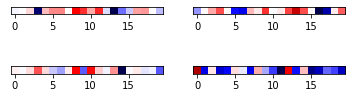

In [ ]:
from tensorflow.keras.models import load_model
# model = load_model('training_mask_2500_images_a=0.6169.h5')
# compare activation similarity
def get_activations(X, model, target_layer, aux_model):
    X = tf.convert_to_tensor(X)
 
    # feed in images and record activations
    # print("Retrieving Neuron Activations")
    with tf.GradientTape(persistent=True) as tape:
        # track the input to see how it changes
        tape.watch(X)
        # retrieve output prediction and hidden layer we specified in aux_model
        neuron_activations = aux_model(X)  # eq 1

    neuron_activations = np.array(neuron_activations).reshape(len(X), n_neurons, )

    return neuron_activations

f, axarr = plt.subplots(2, 2, figsize=(6, 2))
for i in range(2):
  if i == 0:
    model = unconstrained_model
  if i == 1:
    model = constrained_model
  batch_size = 1
  conv = False
  target_layer = len(model.layers)-1 # 9
  n_neurons = model.layers[target_layer].output.shape[-1]
  # define a model that lets us get at the internal activations
  aux_model = tf.keras.Model(inputs=model.inputs,
                              outputs=[model.layers[target_layer].output[:, i] for i in range(n_neurons)])
  img = joined_x[0+i:1+i]
  target_neurons = y_train[0+i]
  
  u, s, vh = perform_SVD(img, model, target_layer, aux_model)
  # print('U shape before transpose:', u.shape)
  u = u.transpose()
  # print('U shape after transpose', u.shape)
  # print('s shape', s.shape)
  u = u.transpose()
  # for component in u:
  #   component /=(np.max(np.abs(component)))
  u = u[0]
  u = u.transpose()
  # w = w_hat.numpy()
  # c = c_hat.numpy()
  if i == 0:
    print("unconstrained")
  else:
    print("constrained")
  
  iris_1 = u[0][-2]
  iris_2 = u[0][-1]
  iris_3 = u[1][-2]
  iris_4 = u[1][-1]
  iris = np.array([iris_1, iris_2, iris_3, iris_4])
  print('iris attention raw:', iris_1, iris_2, iris_3, iris_4)
  print('total raw iris:', np.sum(iris))
  print('total abs iris', np.sum(np.abs(iris)))
  
  component_total_abs = np.sum(np.abs(u[0]))
  iris_attention = np.sum(np.abs(iris)) / component_total_abs
  print('total attention:', component_total_abs)
  print('iris attention of total:', iris_attention)
  print()
  for component in u:
    component /= np.max(np.abs(component))
  img = np.array(img)
  # axarr[0, i].plot(img.reshape(1, 18))
  axarr[0, i].imshow(u[0].reshape(1, 20), vmin=-1, vmax=1, cmap='seismic')
  axarr[1, i].imshow(u[1].reshape(1, 20), vmin=-1, vmax=1, cmap='seismic')
  # axarr[3, i].imshow(u[2].reshape(1, 18), vmin=-1, vmax=1, cmap='seismic')
  axarr[0, i].set_yticks([])
  axarr[1, i].set_yticks([])
  # axarr[2, i].set_yticks([])
  
print('unconstrained accuracy')
unconstrained_model.evaluate(joined_x, y_train[0:150])

print()

print('constrained accuracy')
constrained_model.evaluate(joined_x, y_train[0:150])

# Dotloss loss time

Here we now attempt to constrain without our mask


Dont remember if this bit was still needed for this

In [ ]:
tf.executing_eagerly()

Constrained training code modified to use dotloss

In [ ]:
# changed to function to use tf.function to make it faster
# how many output neurons there are in the target layer, used to visualise gradients etc.
num_classes=2
dot_model = Sequential()
input_shape=(20,)
dot_model.add(Dense(350, input_shape=input_shape, activation='relu'))
dot_model.add(Dense(50, activation='relu'))
dot_model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
optimizer = keras.optimizers.Adam(learning_rate = 1e-4)
dot_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'], )
# model.fit(joined_x, y_train, epochs=500, batch_size=250, verbose=1, validation_split=0.2)

# model = get_model()
# model.summary()
conv = False # whether or not we are using convnet

# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_losses = []
neg_losses = []
acc_losses = []
# parameters
# interpretability mask term
alpha = 1.0
alpha = tf.convert_to_tensor(alpha, dtype=tf.float32)
target_layer = len(dot_model.layers) - 1
n_neurons = dot_model.layers[target_layer].output.shape[-1]
print("Looking at", n_neurons, "neurons in layer", target_layer, dot_model.layers[target_layer].name)
# define a model that lets us get at the internal activations
aux_model = tf.keras.Model(inputs=dot_model.inputs,
                           outputs=[dot_model.layers[target_layer].output[:, i] for i in range(n_neurons)])
start_time = time.time()
# define training step
@tf.function
def step(X, y, batch_size, model, aux_model, target_layer, target_neurons):
  """
  x_batch: input images
  y_batch: correct labels
  batch_size: can be inferred from x_batch
  model: the predicting model to train
  aux_model: the extra model that outputs the target layer of model
  target_layer: which layer to examine
  neuron_mode: target all neurons in the layer or just class neuron (if output layer)
  """
  with tf.GradientTape(persistent=True) as tape:
    # get predictions and calculate acc loss for the batch
    preds = dot_model(X)
    losses = tf.keras.losses.categorical_crossentropy(y, preds)

    # Get internal activations from aux model
    # x = tf.convert_to_tensor(X, dtype=tf.float32)
  
    x = tf.reshape(X, (batch_size, 20))
    with tf.GradientTape(persistent=True) as aux_tape:
      # this is activations at target_layer
      aux_tape.watch(x)
      neuron_activations = aux_model(x)  # eq 1

    # compute gradients w.r.t from neurons in target layer
    # a bit of wasted computation here as all neuron gradients in the layer are
    # calculated even if we don't use them all...
    grad_maps = []
    for neuron in neuron_activations:
      # local grad maps are (28, 28) images to input
      grad_maps.append(aux_tape.gradient(neuron, x))
    grad_maps = tf.reshape(grad_maps, (batch_size, n_neurons, 20))
    x = tf.reshape(x, (batch_size, 20,))
    neuron_activations = tf.reshape(neuron_activations, (batch_size, n_neurons))

    # Caclulate v from neuron-input gradients
    dot_score = tf.convert_to_tensor(0.0, dtype=tf.float32)

    for batch in range(batch_size):
      # which output neuron to use
      target_neuron = target_neurons[batch]
      w_hat = tf.reshape(grad_maps[batch][target_neuron], (20,))  # eq 4
      b_hat = tf.math.subtract(neuron_activations[batch][target_neuron], tf.multiply(x[batch], tf.transpose(w_hat)))  # eq 5
      v = tf.math.add(tf.multiply(w_hat, x[batch]), b_hat)  # eq 2
      c_hat = tf.math.subtract(x[batch], tf.tensordot(v / (tf.tensordot(w_hat, tf.transpose(w_hat), axes=1)), w_hat, axes=1))  # CHECK AXES is 1 for both
      v_hat = tf.math.multiply(tf.math.subtract(x[batch], c_hat), w_hat)  # eq 8
      v = tf.transpose(v_hat)

      # print(c_hat.numpy())
      # print(w_hat)
      # dot_loss = tf.math.abs(tf.tensordot(w_hat[0], c_hat[0], axes=0))
      dot_loss = tf.math.abs(tf.tensordot(w_hat[batch], c_hat[batch], axes=0))

      # dot_loss = tf.math.abs(tf.math.multiply_no_nan(w_hat[0], c_hat[0]))
      # tf.print(dot_loss)
      dot_score = dot_loss #tf.add(dot_score, dot_loss)      

    # acc loss
    loss = tf.math.reduce_sum(losses) / len(losses)
    # constraint violation loss
    dot_loss = tf.multiply(alpha, dot_score)
    dot_loss = tf.clip_by_value(dot_loss, -1e12, 1e12) # remove nan
    # keep acc loss relevant when mask loss is high
    # loss = tf.math.maximum(loss, dot_loss)
    # overall loss to train on
    model_loss = tf.add(loss, dot_loss)
    # end tape
  
  grads = tape.gradient(model_loss, dot_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, dot_model.trainable_variables))
  return loss, dot_loss


# training loop
batch_size = 8
n_batches = len(x_train)//batch_size
max_images = batch_size * n_batches
epochs = 500
for e in range(epochs):
  for i in range(0, max_images-batch_size, batch_size):
    # training stats
    print("Epoch", e, 'of', epochs, "Batch", str(i / batch_size), 'of', str(max_images / batch_size))
    elapsed_time = time.time() - start_time
    elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
    progress = i / max_images * 100
    total_time_estimated = elapsed_time / (i + 1 + e) * (max_images * epochs+ 1) 
    

    # Start training batch
   
    x = np.array(x_train[i:i + batch_size]).reshape(batch_size, 20)
    y = y_train[i:i + batch_size]
    target_neurons = np.argmax(y, axis=1)
    X = tf.convert_to_tensor(x, dtype=tf.float32)
    Y = tf.convert_to_tensor(y, dtype=tf.float32)
    masks = tf.convert_to_tensor(mask, dtype=tf.float32)
    # call function
    # step(x, y, model, aux_model, target_layer)
    loss, mask_loss = step(X, Y, batch_size, dot_model, aux_model, target_layer, target_neurons)
    # report
    print("Time: ", elapsed_time_str, 'out of estimated:', time.strftime("%H:%M:%S", time.gmtime(total_time_estimated)),
      'time remaining:', str(time.strftime("%H:%M:%S", time.gmtime(total_time_estimated - elapsed_time))))
    print('Mask loss:', mask_loss)#, type(mask_loss))
    print('Acc loss:', loss)#, type(loss))
    dot_model.evaluate(joined_x, y_train[0:150])
    model_losses.append(mask_loss + loss)  # sum(model_loss)/len(model_loss))
    neg_losses.append(mask_loss)
    acc_losses.append(loss)


model_losses, neg_losses, acc_losses = np.array(model_losses), np.array(neg_losses), np.array(acc_losses)
filename = 'latest_model.h5'
dot_model.save(filename)

Streaming output truncated to the last 5000 lines.
Epoch 441 of 500 Batch 3.0 of 18.0
Time:  00:15:59 out of estimated: 17:10:42 time remaining: 16:54:42
Mask loss: tf.Tensor(nan, shape=(), dtype=float32)
Acc loss: tf.Tensor(nan, shape=(), dtype=float32)
5/5 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6733
Epoch 441 of 500 Batch 4.0 of 18.0
Time:  00:15:59 out of estimated: 16:29:19 time remaining: 16:13:19
Mask loss: tf.Tensor(nan, shape=(), dtype=float32)
Acc loss: tf.Tensor(nan, shape=(), dtype=float32)
5/5 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6733
Epoch 441 of 500 Batch 5.0 of 18.0
Time:  00:15:59 out of estimated: 15:49:23 time remaining: 15:33:24
Mask loss: tf.Tensor(nan, shape=(), dtype=float32)
Acc loss: tf.Tensor(nan, shape=(), dtype=float32)
5/5 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6733
Epoch 441 of 500 Batch 6.0 of 18.0
Time:  00:15:59 out of estimated: 15:10:41 time remainin

# Now to interpret the new constrained model

In [ ]:
dot_model = model
# dot_model.evaluate(joined_x, y_train[0:150])

Same as before: Unconstrained, Constrained, DotModel

2 target layer
looking at  2  neurons
(None, 20) imput shape
unconstrained
iris attention raw: 0.005979817293874286 -0.07118467152106735 -0.009276320939947348 -0.04251184177424261
total raw iris: -0.11699301694138302
total abs iris 0.1289526515291316
total attention: 2.967512754865805
iris attention of total: 0.04345479267702861

(2, 20)
2 target layer
looking at  2  neurons
(None, 20) imput shape
dot constrained
iris attention raw: -0.030939101675471214 -0.09005736268861786 0.03318007660274701 -0.1908834769901664
total raw iris: -0.27869986475150843
total abs iris 0.3450600179570025
total attention: 2.6131054254407964
iris attention of total: 0.13204978819359936

(2, 20)
unconstrained accuracy
5/5 [==============================] - 0s 3ms/step - loss: 0.2021 - accuracy: 0.9200


dot model accuracy
5/5 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.9000


[0.25032103061676025, 0.8999999761581421]

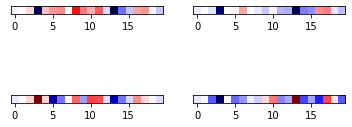

In [ ]:
from tensorflow.keras.models import load_model
# model = load_model('training_mask_2500_images_a=0.6169.h5')
# compare activation similarity
# num_classes=2
# unconstrained_model = Sequential()
# input_shape=(20,)
# unconstrained_model.add(Dense(350, input_shape=input_shape, activation='relu'))
# unconstrained_model.add(Dense(50, activation='relu'))
# unconstrained_model.add(Dense(num_classes, activation='softmax'))

# # Configure the model and start training
# unconstrained_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# unconstrained_model.fit(joined_x, y_train[0:150], epochs=500, batch_size=8, verbose=1)

def get_activations(X, model, target_layer, aux_model):
    X = tf.convert_to_tensor(X)
 
    # feed in images and record activations
    # print("Retrieving Neuron Activations")
    with tf.GradientTape(persistent=True) as tape:
        # track the input to see how it changes
        tape.watch(X)
        # retrieve output prediction and hidden layer we specified in aux_model
        neuron_activations = aux_model(X)  # eq 1

    neuron_activations = np.array(neuron_activations).reshape(len(X), n_neurons, )

    return neuron_activations

f, axarr = plt.subplots(2, 2, figsize=(6, 3))
for i in range(2):
  if i == 0:
    model = unconstrained_model
  if i == 1:
    model = dot_model
  if i == 2:
    model = dot_model
  batch_size = 1
  conv = False
  target_layer = len(model.layers)-1 # 9

  print(target_layer, 'target layer')
  n_neurons = model.layers[target_layer].output.shape[-1]
  print('looking at ', n_neurons, ' neurons')
  print(model.input.shape, 'imput shape')
  # define a model that lets us get at the internal activations
  aux_model = tf.keras.Model(inputs=model.inputs,
                              outputs=[model.layers[target_layer].output[:, i] for i in range(n_neurons)])
  img = joined_x[0+i:1+i]
  target_neurons = y_train[0+i]
  
  u, s, vh = perform_SVD(img, model, target_layer, aux_model)
  # print('U shape before transpose:', u.shape)
  u = u.transpose()
  # print('U shape after transpose', u.shape)
  # print('s shape', s.shape)
  u = u.transpose()
  # for component in u:
  #   component /=(np.max(np.abs(component)))
  u = u[0]
  u = u.transpose()
  # w = w_hat.numpy()
  # c = c_hat.numpy()
  if i == 0:
    print("unconstrained")
  if i == 1:
    print("dot constrained")
  # if i == 2:
    
  iris_1 = u[0][-2]
  iris_2 = u[0][-1]
  iris_3 = u[1][-2]
  iris_4 = u[1][-1]
  iris = np.array([iris_1, iris_2, iris_3, iris_4])
  print('iris attention raw:', iris_1, iris_2, iris_3, iris_4)
  print('total raw iris:', np.sum(iris))
  print('total abs iris', np.sum(np.abs(iris)))
  
  component_total_abs = np.sum(np.abs(u[0]))
  iris_attention = np.sum(np.abs(iris)) / component_total_abs
  print('total attention:', component_total_abs)
  print('iris attention of total:', iris_attention)
  print()
  print(u.shape)
  for component in u:
    component /= np.max(np.abs(component))
  img = np.array(img)
  # axarr[0, i].plot(img.reshape(1, 18))
  axarr[0, i].imshow(u[0].reshape(1, 20), vmin=-1, vmax=1, cmap='seismic')
  axarr[1, i].imshow(u[1].reshape(1, 20), vmin=-1, vmax=1, cmap='seismic')
  # axarr[3, i].imshow(u[2].reshape(1, 18), vmin=-1, vmax=1, cmap='seismic')
  axarr[0, i].set_yticks([])
  axarr[1, i].set_yticks([])
  # axarr[2, i].set_yticks([])
  
print('unconstrained accuracy')
unconstrained_model.evaluate(joined_x, y_train[0:150])

print()

# print('constrained accuracy')
# constrained_model.evaluate(joined_x, y_train[0:150])


print()

print('dot model accuracy')
dot_model.evaluate(joined_x, y_train[0:150])